#### kNN Algorithms

When using kNN for classification, there is no pre-defined rule for determining the optimal number of clusters in k-nearest nieghbor. Instead, like most machine learning algorithms, we evaluate trade-offs and their impact to the data and business problem. Becasue this data is synthetic and there are only 50 observations, it is difficult to measure these trade-offs in the 'Elbow Method for Optimal k' graph. In more meaningful data, an elbow will occur which indicates a diminishing return in the sum of squared distance as an additional cluster is added. As mentioned below, the sum of squared distance approaches zero as k clusters increases. 

Though the data set is a simple and light example, I predict test labels in a small sample using a kNN classifier. In the kNN classifer function, the minkowski and p=2 parameters equate to using standard Euclidean distance. The test accuracy is 67%. Not too strong, but suitable for the size and nature of the data. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(columns = ['Eggs', 'Bread', 'Milk', 'Butter', 'Soda'],
                             index=range(1,51))    

df['Eggs'] = np.random.randint(0,2, size=len(df))
df['Bread'] = np.random.randint(0,2, size=len(df))
df['Milk'] = np.random.randint(0,2, size=len(df))
df['Butter'] = np.random.randint(0,2, size=len(df))
df['Soda'] = np.random.randint(0,2, size=len(df))

df

,Eggs,Bread,Milk,Butter,Soda
1,1,1,1,0,1
2,1,0,0,1,0
3,0,0,0,0,1
4,1,0,1,1,1
5,1,1,1,0,1
6,0,1,0,0,1
7,0,0,0,1,0
8,0,1,1,1,1
9,1,0,0,1,0
10,1,1,1,1,0


In [3]:
df2 = df.copy()
clmns = ['Eggs', 'Bread', 'Milk', 'Butter', 'Soda']

Sum_of_squared_distances = []
K = range(1,51)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)

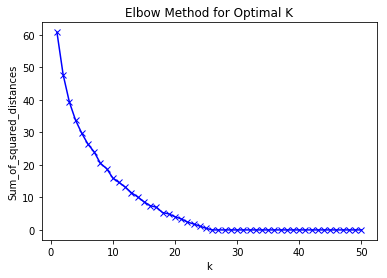

In [4]:
# Elbow Plot    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal K')
plt.show()

As k increases, the sum of squared distance falls to zero. For example, if k where set to the maximum value of n (the number of samples), each sample would form its own cluster and the sum of squared distances would be zero.

Because this is a synthetic dataset, there is not a clear 'elbow' in the graph. The 'elbow' indicates where the increase in k clusters begins to have significant diminishing returns to sum of squared distances (i.e., with each additional k cluster, the loss to sum of squared distance is minimal). 

In [5]:
# use 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0).fit(df2)
labels = kmeans.labels_

# add labels to dataframe
df2['clusters'] = labels

# add column to list of columns
clmns.extend(['clusters'])

# analyze the clusters 
print(df2[clmns].groupby(['clusters']).mean())

              Eggs     Bread      Milk    Butter      Soda
clusters                                                  
0         0.428571  0.000000  1.000000  0.142857  0.857143
1         0.500000  0.000000  0.125000  1.000000  1.000000
2         0.250000  1.000000  0.875000  1.000000  0.875000
3         0.800000  0.800000  1.000000  0.200000  0.000000
4         0.666667  0.000000  0.000000  0.000000  0.000000
5         1.000000  1.000000  0.666667  0.000000  1.000000
6         0.000000  0.333333  0.000000  1.000000  0.000000
7         0.000000  0.500000  0.000000  0.000000  1.000000
8         1.000000  0.000000  0.000000  0.000000  1.000000
9         1.000000  0.000000  0.500000  1.000000  0.000000


In [6]:
X = df2[['Eggs','Bread','Milk','Butter','Soda']]
y = df2['clusters']

#np.random.seed(0)
#indices = np.random.permutation(len(X))
X_train = X[:-15]
y_train = y[:-15]
X_test = X[-15:]
y_test = y[-15:]


In [7]:
# create and fit a nearest neighbor classifier 
#https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
KNeighborsClassifier(algorithm='auto', metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
predicted = knn.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predicted)
acc

0.66666666666666663